# EXPLORATION_2

# 1. Diabetes

### 1.1 모듈설정

#### - pandas, numpy, sklearn 등 기본적인 모듈을 import한다.

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from IPython.display import display, Image

In [233]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

### 1.2 데이터 로드

#### - sklearn.datasets에 포함된 diabetes 데이터를 dataframe 형태로 불러와 데이터를 확인해본다.
#### - 간단하게 head(5)로 5줄 정도만 불러왔고, 10개의 칼럼들로 이루어진 것을 확인할 수 있다.

In [234]:
diabetes=load_diabetes()
print(diabetes.keys())
diabetes_df = pd.DataFrame(data=diabetes.data , columns=diabetes.feature_names)
print(diabetes_df.head(5))

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


#### - 'DESCR'를 확인한다.

In [235]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### diabetes_dataset
 - 인스턴스 : 442개
 - 컬럼 수 : 10 개(age, sex, bmi 등)
 - 타겟 : 기준점 1년 후 질병 진행의 정략적 측정 값
 - 특징 : 컬럼은 각각 'n_samples'로 평균 중심화되고 크기가 조정됨

### 1.3 데이터 분류 및 학습

#### - 모델에 입력할 X, y데이터를 준비한다  

#### - 442개의 데이터가 잘 준비된 것을 확인할 수 있다

In [236]:
df_X = diabetes.data
df_y = diabetes.target

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


#### - 쓰기 편하게 X, y 로 수정했다  

In [237]:
X = df_X
y = df_y

#### ===== 뒤에서 자세히 설명하겠지만 test_size의 설정이 중요하다 =====

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=22)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(265, 10) (265,)
(177, 10) (177,)


#### - 가중치 W(칼럼 수에 맞춰 준비), 바이어스 b 값을 설정한다

In [239]:
W = np.random.rand(10)
b = np.random.rand()
print(W, b)

[0.24302686 0.72916771 0.32091671 0.3802722  0.19881214 0.8296163
 0.76548747 0.43603009 0.18995691 0.64579514] 0.880350791791125


#### - model, loss, MSE, gradient를 구하는 함수를 구현한다  
 - learning_rate 값도 설정한다  
    (learning_rate 값은 기본 0.1로 설정했으며 0.1, 0.01, 0.001, 0.0001으로 조정했다)

In [240]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db
    
LEARNING_RATE = 0.1

#### - 손실함수를 초기화시키고 W, b를 업데이트 하며 손실함수를 기록하는 과정을 진행한다.

 - 적절한 값을 찾으려면 모델 학습 후 plot(losses) 그래프를 통해 셋팅 값을 줄여갈 수 있다)  
 
 - iter 값이 약 40,000번을 넘어서면 Loss 값의 변동은 미미한 수준이다.

In [241]:
losses = []

for i in range(1, 100000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
    if i % 100000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10000 : Loss 2924.6970
Iteration 20000 : Loss 2923.4659
Iteration 30000 : Loss 2923.2357
Iteration 40000 : Loss 2923.1927
Iteration 50000 : Loss 2923.1846
Iteration 60000 : Loss 2923.1831
Iteration 70000 : Loss 2923.1828
Iteration 80000 : Loss 2923.1828
Iteration 90000 : Loss 2923.1828


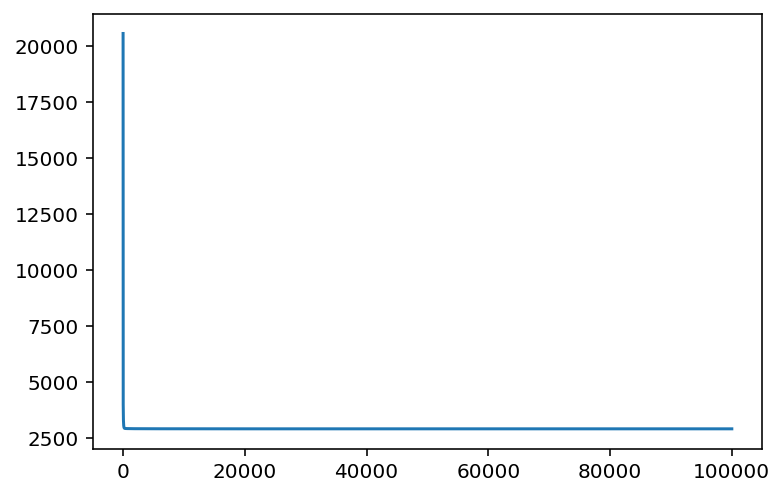

In [242]:
plt.plot(losses)
plt.show()

 - plot 그래프를 보면 Loss값을 잘 찾아가고 있는 것을 확인할 수 있다.
 - 위 그래프가 너무 'ㄴ'같아 보여서 아래 loss값이 떨어지는 구간을 확대해 보았다.
 - 나중에 돌아보니 생각보다 반복을 많이 했다고 판단했다 횟수를 줄여도 좋겠다.

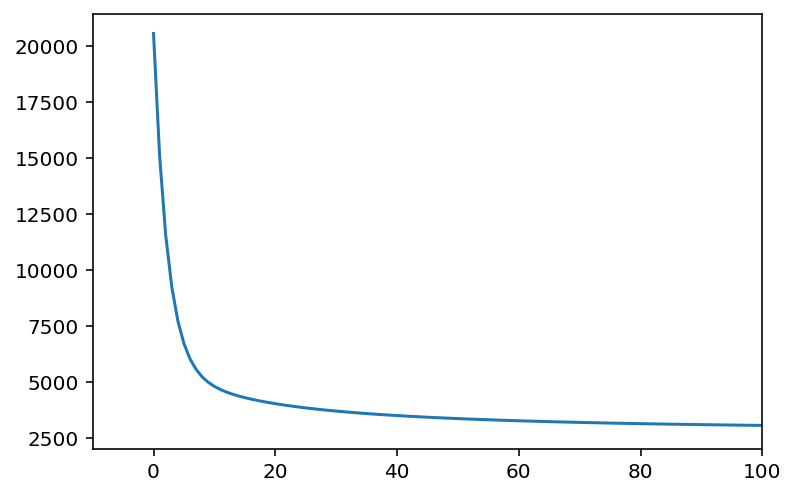

In [243]:
plt.plot(losses)
plt.xlim(-10,100)
plt.show()

- test에 대해서 예측을 진행한다.

In [244]:
print(losses[-1])

2923.182767589035


In [245]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)

2890.7248628279926


#### - 데이터를 train과 test로 분류할 때 test_size를 지정하는 부분과 관련된 내용(learning_rate 0.1 기준)
##### 1) test_size=0.2 / test_mse = 약 3,187  
##### 2) test_size=0.3 / test_mse = 약 2,972  
##### 3) test_size=0.4 / test_mse = 약 2,890
   
==============================================================================================
 - 위 결과에서 보이는 것과 같이 test 데이터의 크기가 너무 작으면 정작 훈련된 데이터를 가지고 예측을 진행했을 때 mse 값의 차이가 크게 벌어지는 현상이 있었다. 이에 적절한 test_size를 지정해야 하며,0.3~0.4 정도로 하는 것이 적합해 보인다(원인을 생각해보자면 test_data의 크기가 작으면 분류해야 할 타깃의 분포가 균일하지 못해서 발생했을 것이라 추측한다)

#### - Learning_rate 값 조절
##### 1) learning_rate = 1 / Loss 값 발산
##### 2) learning_rate = 0.1 / Loss = 약 2,923
##### 3) learning_rate = 0.01 / Loss = 약 2,924
##### 4) learning_rate = 0.001 / Loss = 약 2,932
##### 5) learning_rate = 0.0001 / Loss = 약 3,116

==============================================================================================

 - 결과를 보면 0.1 ~ 0.001까지의 값으로 이용하는 것이 유효하다.
   (조금씩 고쳐가며 사용하자)
 - 1값은 무한대로 발산하는 모습을 볼 수 있고, 0.0001값은 mse 값이 3,000을 넘어간다.  
 (추측해보건데 0.1 값이 우리가 원하는 global oprimum 가장 최적의 해를 구할 수 있다고 판단하며, 너무 큰 값을 설정하면 global optimum 근처도 못가고 발산하고, 너무 작은 값을 선택하면 Local optimum에 빠질 수 있다고 생각한다.) 

 - 산점도로 확인

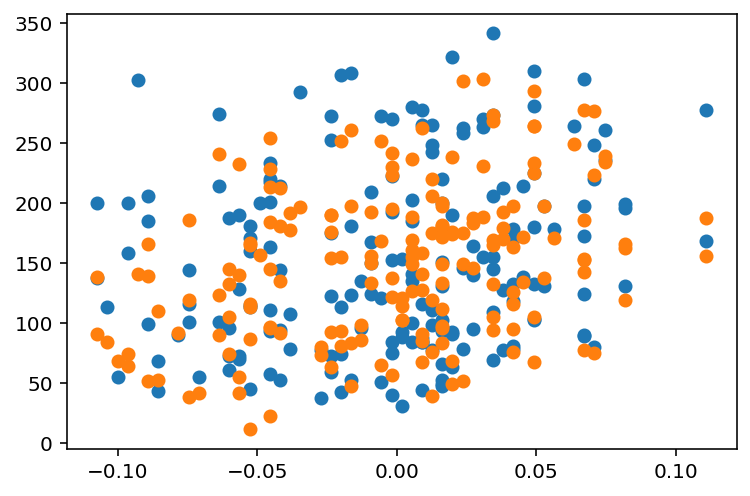

In [246]:
plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], prediction, label='pred')
plt.show()

 - 실제 데이터와 예측 데이터가 잘 맞는 것처럼 보인다. 아래는 x, y 축을 좀 더 늘려보았다.

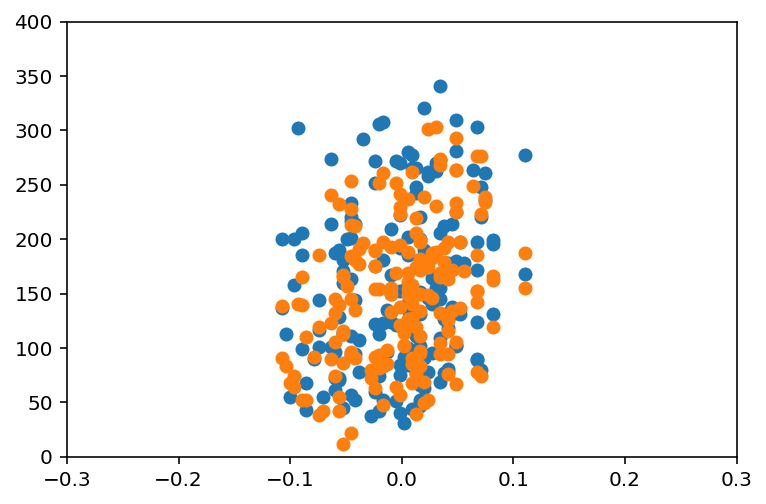

In [247]:
plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], prediction, label='pred')
plt.ylim(0, 400)
plt.xlim(-0.3, 0.3)
plt.show()

#### - LinearRegression 모델 학습

 - sklearn의 LinearRegession 모델로 학습해본다.
 (기존 데이터와 섞이지 않게 뒤에 _L을 붙여 구분)  
 - 위에서 함수를 만들며 실습한 모델을 다른 모델과 비교하여 잘 동작하는지 여부를 확인하고자 한다.

In [248]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=22) 위에서 이미 나눠줬으므로 이를 가지고 예측한다.

In [249]:
model_L = LinearRegression()

In [250]:
model_L.fit(X_train, y_train)

LinearRegression()

In [251]:
predictions_L = model_L.predict(X_test)
predictions_L

array([ 91.30911077, 251.81304254, 187.83018086, 169.19871861,
       165.88626941, 185.45451146,  75.60557296,  66.98873207,
       189.61054179, 249.14243065, 189.419533  ,  96.49724825,
        94.56568445, 197.16062342,  92.00710274,  41.65290851,
        38.90070485, 160.66270175, 177.11893292, 224.96558142,
       165.33852097, 158.13359293, 144.79963747, 263.7181389 ,
       149.97418613, 236.69701987, 192.41073588, 109.68362497,
        63.33130906, 102.58452093, 136.95606105, 194.99220111,
        54.54940019, 241.16460948, 125.69117018, 156.82621238,
       132.40246049, 179.25343979, 154.45224036, 238.45764438,
       276.10752895,  51.71904791, 182.77013707, 115.50995836,
       191.09087966, 187.34083661, 113.91963124, 196.46796202,
       187.98340062, 170.38061739,  84.99364352, 303.44713249,
       162.26582599, 154.54024511, 121.33864483,  85.58059367,
        90.25926656,  90.53842961,  74.4777584 ,  22.05600294,
       155.51253338, 180.29901136, 105.13183522, 293.48

In [252]:
mse_L = mean_squared_error(y_test, predictions_L)
mse_L

2890.7167950503117

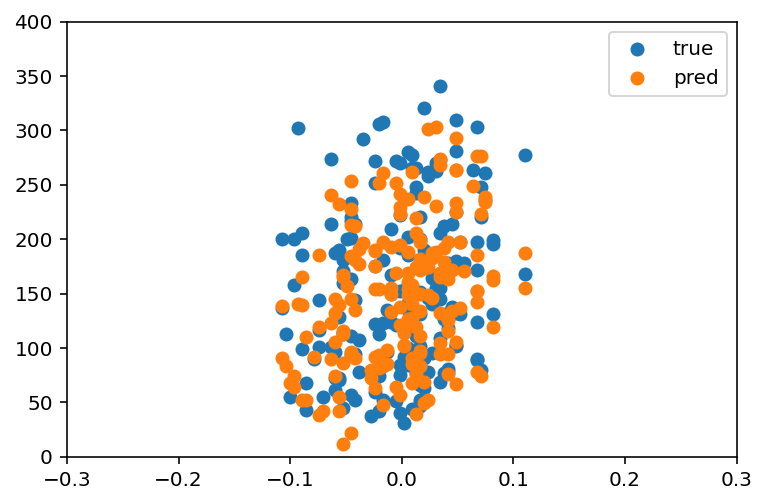

In [253]:
plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], predictions_L, label='pred')
plt.ylim(0, 400)
plt.xlim(-0.3, 0.3)
plt.legend()
plt.show()

- 분하다 더 좋아보인다... 
- 위에서 만든 모델의 mse 값은 2923, LinearRegression 모델의 mse 값은 2890으로 확인할 수 있으며, 선형회귀 모델과 비교해 봤을 때 처음 만든 모델 또한 나쁘지 않다고 판단한다.

### 1.4 결과분석

### === 잘 만들어진 모델을 잘 써먹자! ===  

- 직접 모델을 설계하고 손실함수 정의, 기울기를 계산해 보았다. sklearn에 포함된 Linear Regression과 비교해 볼 때 준수하다고 판단되지만, 이미 잘 만들어진 모델을 두고 굳이 매번 만들어 쓰기는 비효율적이라고 생각된다. 원리를 익혔다는 생각으로 접근하는 것이 좋겠다.  


- 시각화는 데이터를 잘 살펴볼 수 있는 유용한 방법이다. 단순히 2924, 2821의 수치로 보기보다는 시각화를 활용해서 실제 데이터와 예측 데이터가 잘 붙어있는지 보는 것이 좋겠다.

# 2. Bike Sharing Demand

### 2.1 모듈설정

In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display, Image

### 2.2 데이터 로드

 - 데이터는 github repositories에 올려 raw 주소 값으로 불러온다.
 - train, test csv 모두 load

In [255]:
df_bike_train = pd.read_csv('https://raw.githubusercontent.com/Chae0220/AI_Study/main/data/bike_sharing_demand_train.csv')
df_bike_test = pd.read_csv('https://raw.githubusercontent.com/Chae0220/AI_Study/main/data/bike_sharing_demand_test.csv')
print(df_bike_train.head(5))
# print(df_bike_test.head(5))

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


- 잘 출력된다.

 - datetime 자료형으로 변환(그냥 year, month, dat, hour, minute, second로 나누면 error 발생)

In [256]:
print(df_bike_train.info(['datetime']))
df_bike_train['datetime'] = pd.to_datetime(df_bike_train['datetime'])
print(df_bike_train.info(['datetime']))
print(df_bike_train.head(5))

#테스트 데이터도 동일하게 변경
df_bike_test['datetime'] = pd.to_datetime(df_bike_test['datetime'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime6

In [257]:
df_bike_train['year'] = df_bike_train['datetime'].dt.year 
df_bike_train['month'] = df_bike_train['datetime'].dt.month
df_bike_train['day'] = df_bike_train['datetime'].dt.day
df_bike_train['hour'] = df_bike_train['datetime'].dt.hour
df_bike_train['minute'] = df_bike_train['datetime'].dt.minute
df_bike_train['second'] = df_bike_train['datetime'].dt.second

#테스트 데이터도 동일하게 변경
df_bike_test['year'] = df_bike_test['datetime'].dt.year 
df_bike_test['month'] = df_bike_test['datetime'].dt.month
df_bike_test['day'] = df_bike_test['datetime'].dt.day
df_bike_test['hour'] = df_bike_test['datetime'].dt.hour
df_bike_test['minute'] = df_bike_test['datetime'].dt.minute
df_bike_test['second'] = df_bike_test['datetime'].dt.second

In [258]:
print(df_bike_train.shape)

(10886, 18)


### 2.3 데이터 확인

In [259]:
print(df_bike_train.keys())
print(df_bike_train.head(5))

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')
             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   


- 년, 월, 일, 시, 분, 초 잘 나뉜 모습을 볼 수 있다(사실 분, 초는 큰 의미가 없어 보인다)
- datetime으로 날짜를 나눴으니 dayofweek로 요일을 구분했다.

In [260]:
df_bike_train['dow'] = df_bike_train['datetime'].dt.dayofweek
df_bike_train['dow'].value_counts()
print(df_bike_train.keys())
print(df_bike_train.head(5))

#테스트 데이터도 동일하게 변경
df_bike_test['dow'] = df_bike_test['datetime'].dt.dayofweek

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dow'],
      dtype='object')
             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1   

- dow(day of week) 컬럼이 잘 만들어졌다.
- 참고로 2011년 1월 1일은 토요일이다.   
  (0: 월 / 1: 화 / 2: 수 / 3: 목 / 4: 금 / 5: 토 / 6: 일)

In [261]:
print('=======================================')
print(df_bike_train["season"].value_counts())
print('=======================================')
print(df_bike_train["holiday"].value_counts())
print('=======================================')
print(df_bike_train["workingday"].value_counts())
print('=======================================')
print(df_bike_train["weather"].value_counts())
print('=======================================')
print(df_bike_train["temp"].value_counts())
print('=======================================')
print(df_bike_train["atemp"].value_counts())
print('=======================================')
print(df_bike_train["humidity"].value_counts())
print('=======================================')
print(df_bike_train["windspeed"].value_counts())
print('=======================================')
print(df_bike_train["dow"].value_counts())
print('=======================================')

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
0    10575
1      311
Name: holiday, dtype: int64
1    7412
0    3474
Name: workingday, dtype: int64
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64
31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.3

- 나머지 데이터도 한번씩 훑어본다.

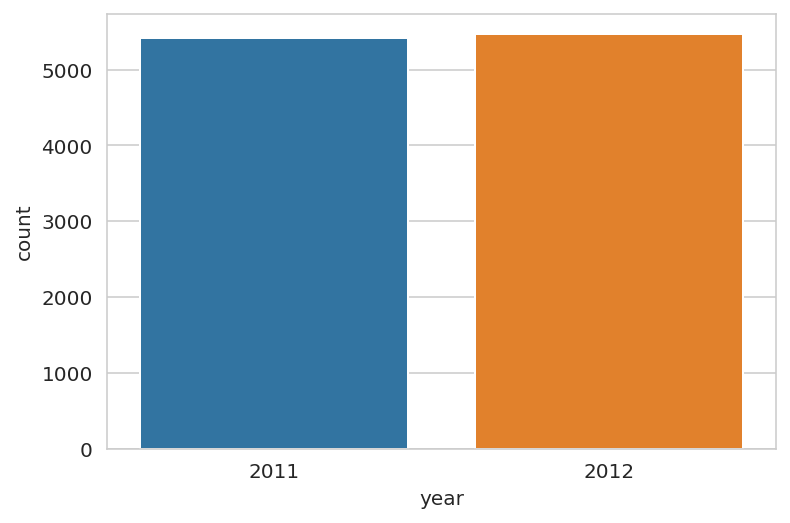

In [262]:
sns.set_style('whitegrid')
sns.countplot(x='year', data=df_bike_train)
plt.show()

- year를 countplot으로 확인해보면 2011년과 2012년 수치가 비슷하다.   
  여기에는 한가지 맹점이 있는데 countplot은 x축 설정이 안된다
  (ValueError: Cannot pass values for both `x` and `y`)  
  
  우리가 알고자 하는 것은 casual과 registered의 합인 count 값이므로 y축을 추가할 수 있는 barplot을 사용한다.

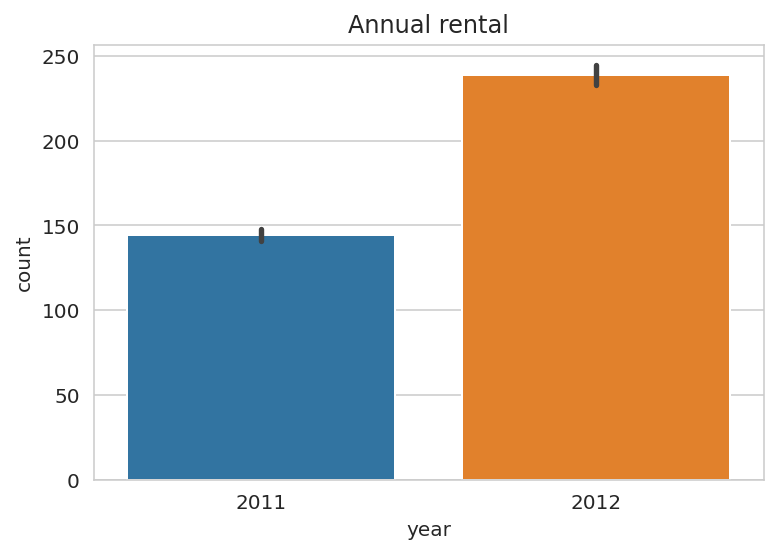

In [263]:
year = sns.barplot(data=df_bike_train, x = 'year', y = 'count')
year.set(title='Annual rental')
plt.show()

- 이제야 제대로 나온다 2011년보다 2012년도가 대여량이 늘었다는 걸 알 수 있다.
- 여러 데이터를 한꺼번에 확인해보자!

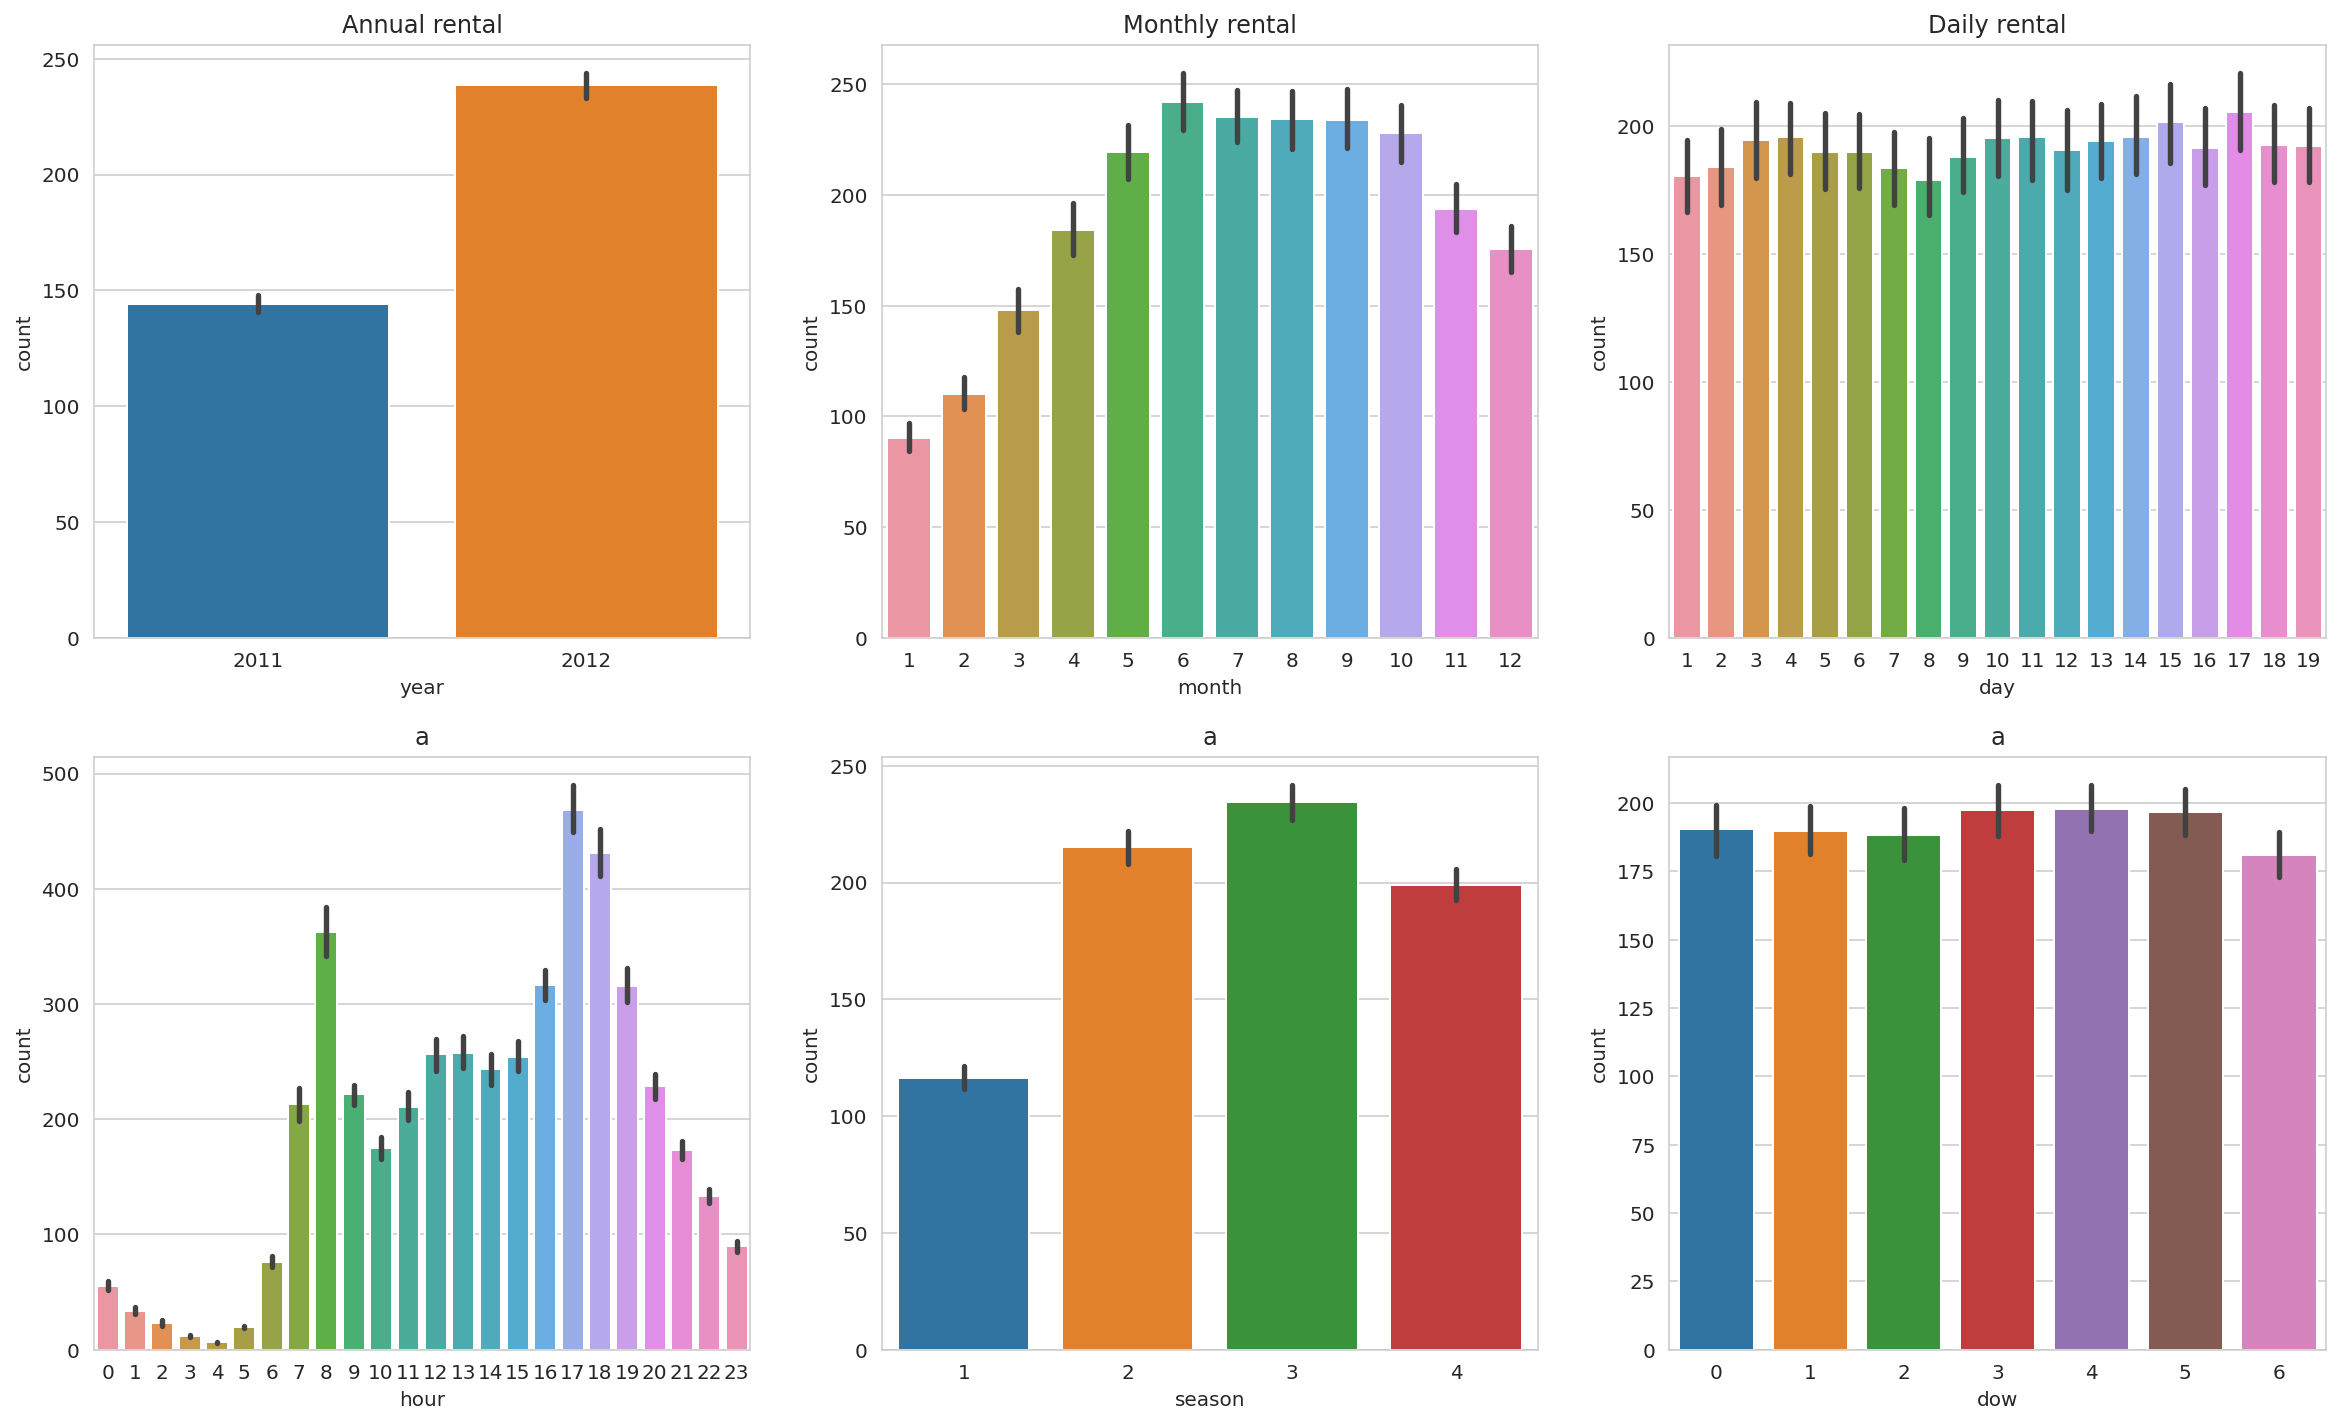

In [264]:
fig, ax =  plt.subplots(nrows = 2, ncols = 3, figsize=(20, 12))

ax01 = sns.barplot(data=df_bike_train, x = 'year', y = 'count', ax=ax[0,0])
ax01.set(title = 'Annual rental')
ax02 = sns.barplot(data=df_bike_train, x = 'month', y = 'count', ax=ax[0,1])
ax02.set(title = 'Monthly rental')
ax03 = sns.barplot(data=df_bike_train, x = 'day', y = 'count', ax=ax[0,2])
ax03.set(title = 'Daily rental')
ax04 = sns.barplot(data=df_bike_train, x = 'hour', y = 'count', ax=ax[1,0])
ax04.set(title = 'a')
ax05 = sns.barplot(data=df_bike_train, x = 'season', y = 'count', ax=ax[1,1])
ax05.set(title = 'a')
ax06 = sns.barplot(data=df_bike_train, x = 'dow', y = 'count', ax=ax[1,2])
ax06.set(title = 'a')

plt.show()

- 2011년보다 2012년에 대여량이 더 많았고, 6월이 자전거를 가장 많이 대여하는 달로 볼 수 있다.
- 일별 대여량은 대체로 비슷한 수준이라 볼 수있고, 요일별로 보면 목, 금, 토요일에 대여가 많이 이루어졌다.
- 시간별로는 08, 17, 18시에 집중된 것으로 볼 때 출퇴근 시간과 겹쳐있다는 것을 알 수 있다.
- 계절별로 봄보다는 가을, 여름에 집중된 것을 확인할 수 있다.

### 2.4 데이터 분류 및 학습

- 데이터를 분류하기 전에 의미 없는 데이터들은 제외하려 한다.  
- 그냥 그래프로만 보면 크게 와닿지 않아서 hitmap을 사용해보려한다.
 (다 때려 넣어보자!)  
 'datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'dow'  
 
 
- 너무 많다.. 위에서 데이터를 여러번 봤기 때문에 상관 있어보이는 것을 위주로 걸러서 넣는다.  
'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count', 'Month', 'Day', 'Hour', 'dow'

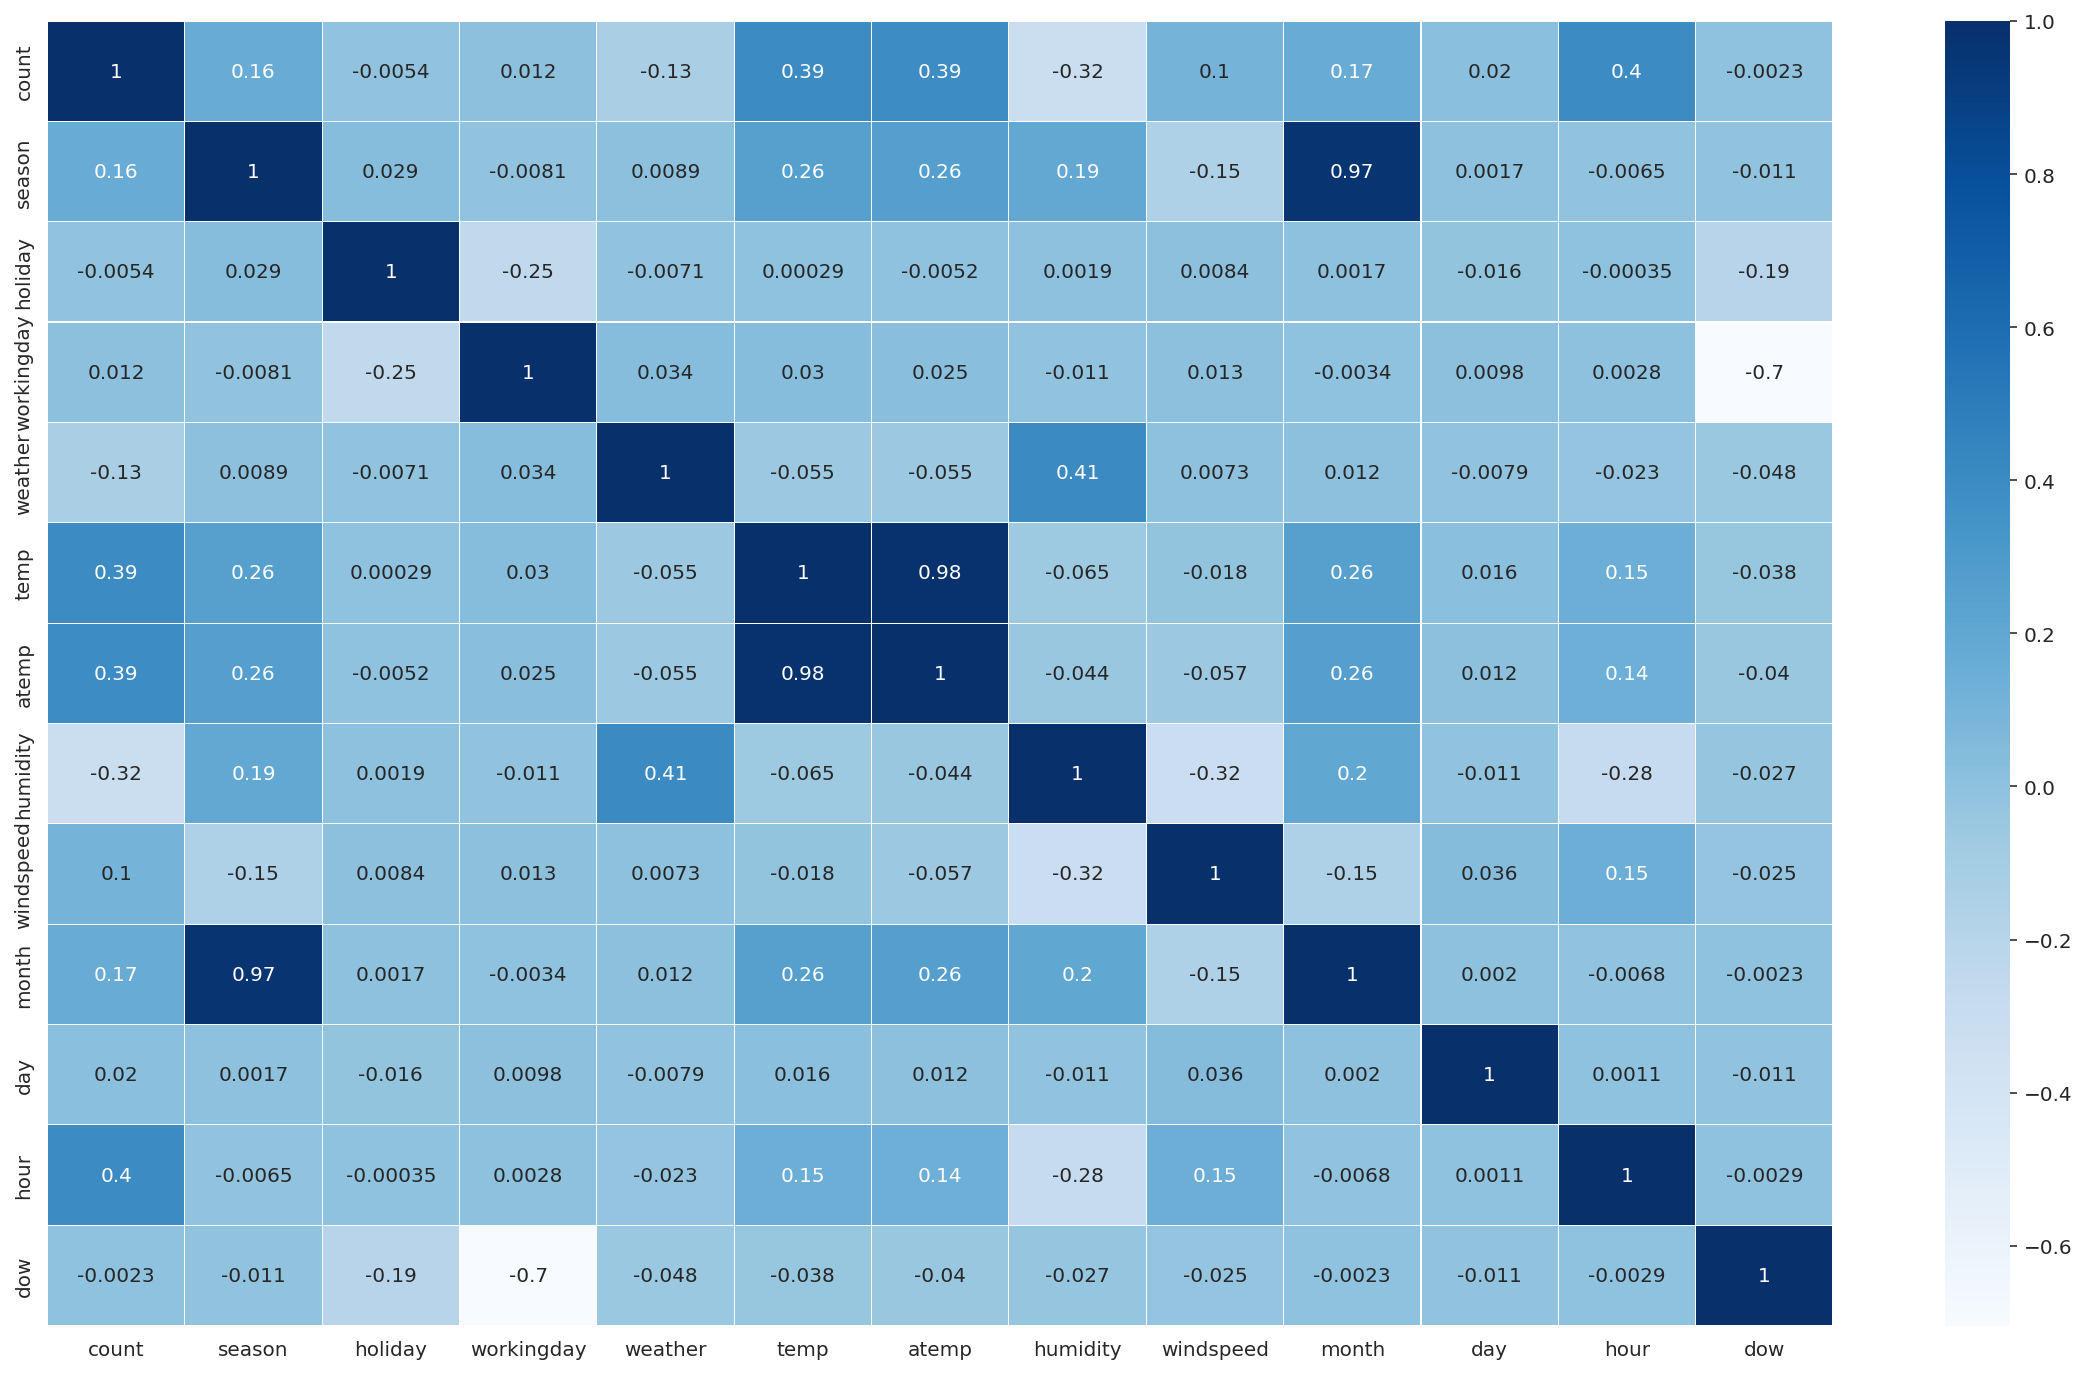

In [265]:
corr_train = df_bike_train[['count', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'day', 'hour', 'dow']].corr()
fig, ax = plt.subplots(figsize=(20,12))

sns.heatmap(data=corr_train, ax=ax, linewidths=0.1, linecolor='white', annot=True, cmap='Blues')
plt.show()

- hitmap을 통해 count와 관련이 깊은 것은 temp, atemp, hour 임을 알 수 있다.  

- 모델 학습과 테스트 데이터로 분류하기 전에 겹치거나 크게 의미가 없어 보이는 데이터를 drop 해준다.

In [266]:
print(df_bike_train.keys())

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dow'],
      dtype='object')


- 연속형 feature인 temp, atemp, humidity 등의 값은 그대로 가져갈 수 있지만, 범주형 feature들은 astype으로 int64에서 category형으로 바꾸고 season, weather, dow 등은 one-hot encoding을 해준다.

In [267]:
df_bike_train.drop(['datetime', 'year', 'minute', 'second', 'day', 'casual', 'registered'], inplace=True, axis=1)
df_bike_test.drop(['datetime', 'year', 'minute', 'second', 'day',], inplace=True, axis=1)

df_bike_train['month'] = df_bike_train['month'].astype('category')
df_bike_train['hour'] = df_bike_train['hour'].astype('category')
df_bike_train['holiday'] = df_bike_train['holiday'].astype('category')
df_bike_train['workingday'] = df_bike_train['workingday'].astype('category')
df_bike_train['dow'] = df_bike_train['dow'].astype('category')
df_bike_train['season'] = df_bike_train['season'].astype('category')
df_bike_train['weather'] = df_bike_train['weather'].astype('category')

# 테스트 데이터도 동일하게 적용한다.
df_bike_test['month'] = df_bike_test['month'].astype('category')
df_bike_test['hour'] = df_bike_test['hour'].astype('category')
df_bike_test['holiday'] = df_bike_test['holiday'].astype('category')
df_bike_test['workingday'] = df_bike_test['workingday'].astype('category')
df_bike_test['dow'] = df_bike_test['dow'].astype('category')
df_bike_test['season'] = df_bike_test['season'].astype('category')
df_bike_test['weather'] = df_bike_test['weather'].astype('category')


df_bike_train = pd.get_dummies(df_bike_train, columns=['season','weather', 'dow'])
df_bike_test = pd.get_dummies(df_bike_test, columns=['season','weather', 'dow'])


print(df_bike_train.head())
print(df_bike_train.head())

  holiday workingday  temp   atemp  humidity  windspeed  count month hour  \
0       0          0  9.84  14.395        81        0.0     16     1    0   
1       0          0  9.02  13.635        80        0.0     40     1    1   
2       0          0  9.02  13.635        80        0.0     32     1    2   
3       0          0  9.84  14.395        75        0.0     13     1    3   
4       0          0  9.84  14.395        75        0.0      1     1    4   

   season_1  ...  weather_2  weather_3  weather_4  dow_0  dow_1  dow_2  dow_3  \
0         1  ...          0          0          0      0      0      0      0   
1         1  ...          0          0          0      0      0      0      0   
2         1  ...          0          0          0      0      0      0      0   
3         1  ...          0          0          0      0      0      0      0   
4         1  ...          0          0          0      0      0      0      0   

   dow_4  dow_5  dow_6  
0      0      1      0  


- test도 train 데이터와 같이 컬럼을 맞춰준다.

In [268]:
print(df_bike_train.keys())
print('==============================================================================')
print(df_bike_test.keys())

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'month', 'hour', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'dow_0',
       'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6'],
      dtype='object')
Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'month', 'hour', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'dow_0', 'dow_1',
       'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6'],
      dtype='object')


- df_bike_train 데이터를 이용해서 X_train, y_train, X_test, y_test를 나눠준다.  
- LInear Regression을 이용해 모델을 학습시키고 예측을 진행해서 손실함수 값까지 구해본다

In [269]:
feature_names = ['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 
                 'month', 'hour', 'season_1', 'season_2', 'season_3', 'season_4',
                 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'dow_0', 'dow_1', 
                 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6']

X = df_bike_train[feature_names]
y = df_bike_train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.5 Linear Regression 활용

- train과 test로 분리한 데이터를 linear regression으로 학습시키고 예측한다.

In [270]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE : ", mse)
print("RMSE : ", mse ** 0.5)

MSE :  21580.65922931928
RMSE :  146.9035711932126


- Linear Regress를 사용해서 RMSE값이 목표치인 150아래로 나왔으나 만족을 못하겠다.
- Random Forest 하나만 더 써보도록 한다.
- 여기서 주의할 점은 random forest를 클라우드 커널에서 돌렸더니 커널이 죽는다..  
이럴 땐 구글 코랩이다! 더군다나 코랩 pro 사용자인데 이정도는 누려야지

### 2.6 Random Forest 활용
 - RandomForestClassifier를 활용해 다시 학습하고 이를 df_bike_test데이터에 적용한다.

In [271]:
# =============== RandomForestClassifier 활용 ===============
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
predictions2 = random_forest.predict(X_test)
mse2 = mean_squared_error(y_test, predictions2)
print('MSE : ', mse2)
print('RMSE : ', mse2 ** 0.5)

MSE :  16873.425597060625
RMSE :  129.89775054657653


- 참 맘에 드는 수치다!
- scatter와 distplot을 이용해 시각화하였다.
- test 데이터의 정답과 예측값이 잘 맞는 것을 볼 수 있다.

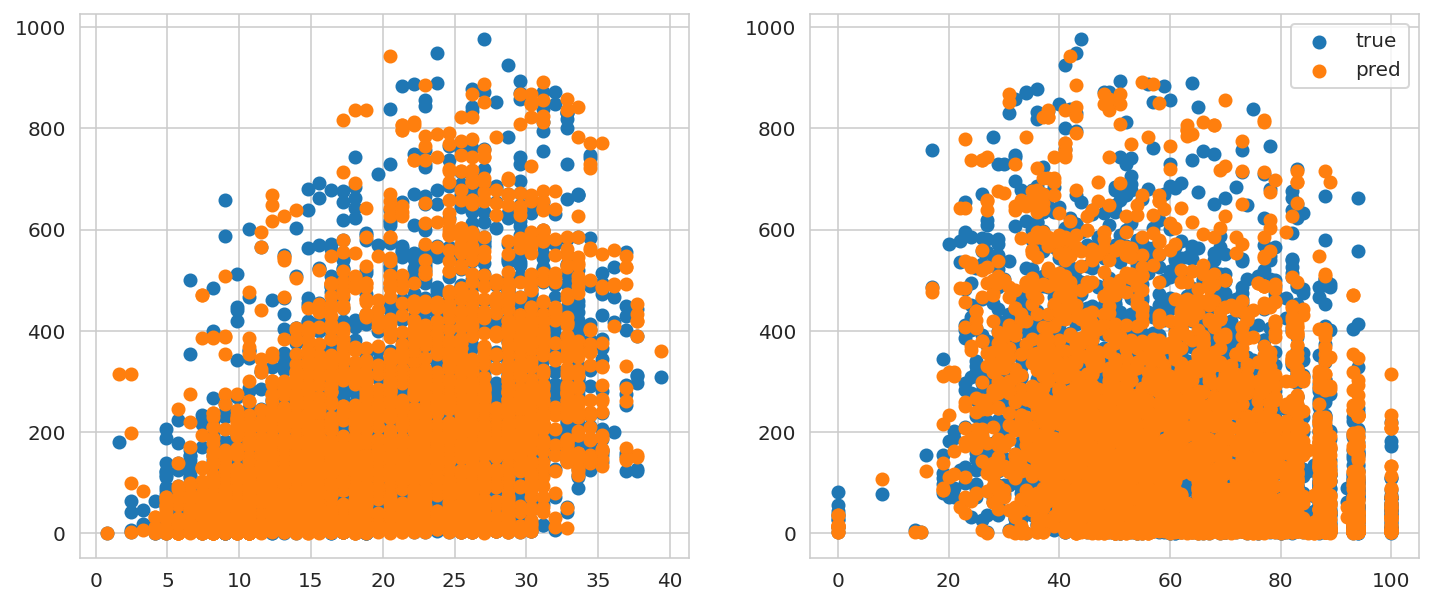

In [272]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((12, 5))

ax[0].scatter(X_test['temp'], y_test, label='true')
ax[0].scatter(X_test['temp'], predictions2, label='pred')
ax[1].scatter(X_test['humidity'], y_test, label='true')
ax[1].scatter(X_test['humidity'], predictions2, label='pred')
plt.legend()
plt.show()

- distplot의 히스토그램에서 막대그래프는 제외하고 확인해보았다(파란색이 true, 빨간색이 prediction)  
  역시 y_train의 실제 값과 model을 통해 예측한 predictions 값이 잘 맞는 것을 확인할 수 있다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


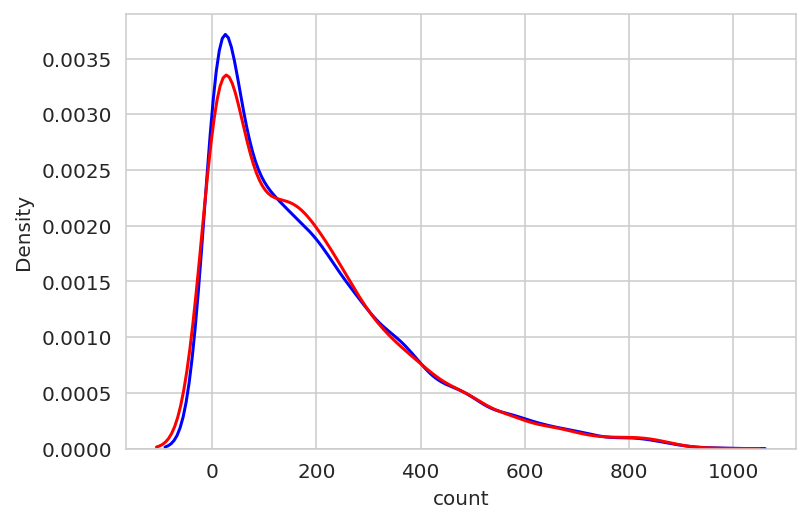

In [273]:
sns.distplot(y_train, color='blue', label='true', hist=False)
sns.distplot(predictions2, color='red', label='pred', hist=False)

- Random Forest 적용  
  
- 처음부터 목적은 train으로 학습해 test에 결과 값을 도출해내는 것이었다.  
  random forest가 좋은 RMSE를 보여줬으므로 Linear Regress는 과감히 버리고 random forest로 예측을 해본다.
  
- 이미 학습도 했고, X_test_data에 정답지가 없으므로 RMSE를 구할 필요도 없다!

In [274]:
# =============== 예측에 사용할 데이터 정의 ===============
X_test_data = df_bike_test[feature_names]
# =============== RandomForestClassifier 적용 ===============
predictions3 = random_forest.predict(X_test_data)

- 앞서 진행한 것과 마찬가지로 scatter와 distplot을 이용해 시각화하였다.  
  산점도를 보면 test 데이터의 정답과 예측값이 잘 맞는 것을 볼 수 있다.

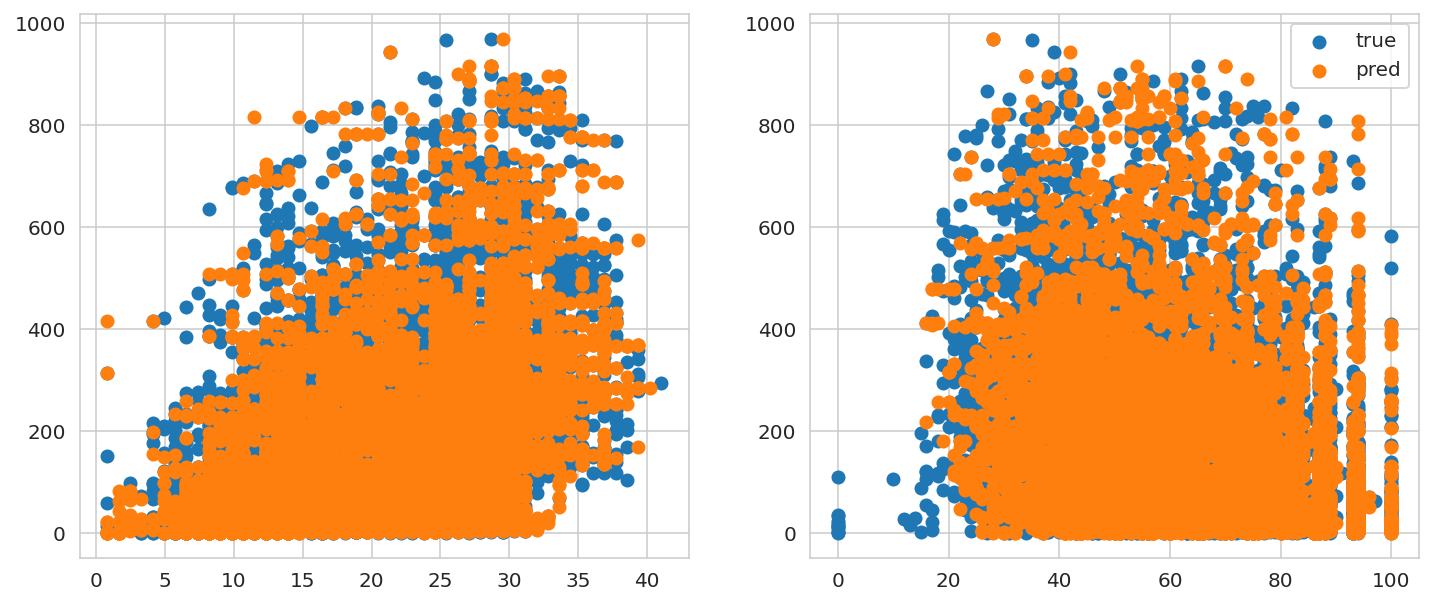

In [275]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((12, 5))

ax[0].scatter(X_train['temp'], y_train, label='true')
ax[0].scatter(X_test_data['temp'], predictions3, label='pred')
ax[1].scatter(X_train['humidity'], y_train, label='true')
ax[1].scatter(X_test_data['humidity'], predictions3, label='pred')
plt.legend()
plt.show()

- distplot의 히스토그램에서 막대그래프는 제외하고 확인해보았다.
  역시 y_train의 실제 값과 model을 통해 예측한 predictions3 값이 잘 맞는 것을 확인할 수 있다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


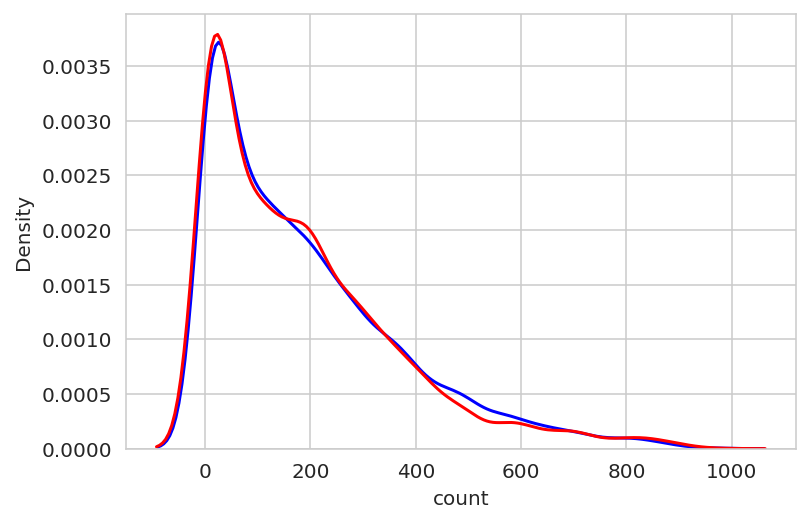

In [276]:
sns.distplot(y_train, color='blue', label='true', hist=False)
sns.distplot(predictions3, color='red', label='pred', hist=False)

### 2.7 결과분석

### === EDA에 공을 들이자! ===
### === 여러 모델을 다 써보자 ===
  
- EDA 과정은 매우 중요하다. 정확도가 높은 모델을 쓰더라도 데이터를 분석하고 처리하는 과정에서 오류가 들어가면 결과물이 쓸모없다고 생각하기 때문이다. 그렇기 때문에 시각화하고 데이터를 뜯어보는 시간에 더 공을 들이자!

- 모델을 적어도 두 개 이상 사용해야 할 것 같다. Linear Regression 하나만 사용했으면 더 좋은 결과를 놓치고 갈 부분이었다고 생각한다.

- 사실 제일 마지막에 random forest로 test 데이터를 예측한 후 그린 시각화는 큰 의미가 없다고 생각한다. 비교할 답지가 없으니 학습한 데이터와 매우 유사하게 나올 게 뻔하니 말이다. 매번 예측값 가지고 시각화했는데 그냥 두기 아쉬워서 한 것이다  ***(트레이닝한 데이터와 예측한 데이터가 잘 붙어있다)*** 정도로 생각하고 넘어가 주시면 좋을 것 같다.